In [2]:
import pandas as pd
import plotly.graph_objects as go
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
import yfinance
import cufflinks as cf
import talib
import pandas_ta
from tapy import Indicators
import numpy as np

In [3]:
def get_his_data_filename(pair, granularity):
    return f"his_data/{pair}_{granularity}.csv"


In [4]:
df = pd.read_csv(get_his_data_filename('USD_JPY','D'))
df.drop(columns=df.columns[0],inplace=True)

In [5]:
df_plot = df[:]

In [6]:
fig = go.Figure()
fig.add_trace(go.Candlestick(
    x=df_plot.time, open=df_plot.mid_o, high=df_plot.mid_h, low=df_plot.mid_l, close=df_plot.mid_c,
    line=dict(width=1), opacity=1,
    increasing_fillcolor='#24A06B',
    decreasing_fillcolor="#CC2E3C",
    increasing_line_color='#2EC886',  
    decreasing_line_color='#FF3A4C'
))
fig.update_layout(width=1000,height=400,
    margin=dict(l=10,r=10,b=10,t=10),
    font=dict(size=10,color="#e1e1e1"),
    paper_bgcolor="#1e1e1e",
    plot_bgcolor="#1e1e1e")
fig.update_xaxes(
    gridcolor="#1f292f",
    showgrid=True,fixedrange=True,rangeslider=dict(visible=False)
)
fig.update_yaxes(
    gridcolor="#1f292f",
    showgrid=True
)
fig.show()

In [7]:
# Get the EUR/USD data from Yahoo finance:
data = pdr.get_data_yahoo("USDJPY=X", start="2019-01-01", end="2021-05-01")

# add SAR column for parabolic SAR

data['SAR'] = talib.SAR(data.High, data.Low, acceleration=0.02, maximum=0.2)

# add DEMARKER using tapy library

indicators = Indicators(data)
indicators.de_marker(column_name='DeMarker')
data = indicators.df

data.tail()

,High,Low,Open,Close,Volume,Adj Close,SAR,DeMarker
Date,,,,,,,,
2021-04-25,108.186996,107.652000,107.880997,107.874001,0.0,107.874001,109.187558,0.050829
2021-04-26,108.570000,108.100998,108.188004,108.202003,0.0,108.202003,108.912749,0.178635
2021-04-27,109.070000,108.712997,108.737999,108.750000,0.0,108.750000,107.470001,0.363540
2021-04-28,109.219002,108.438004,108.504997,108.504997,0.0,108.504997,107.502001,0.350223
2021-04-29,109.333000,108.712997,108.915001,108.903999,0.0,108.903999,107.570681,0.372862


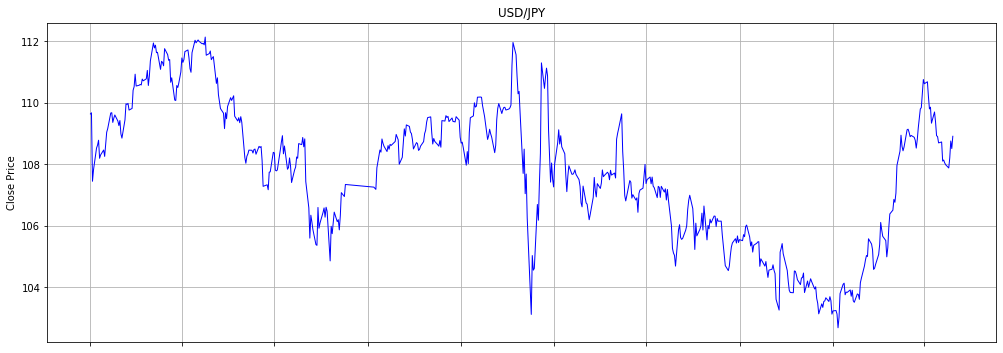

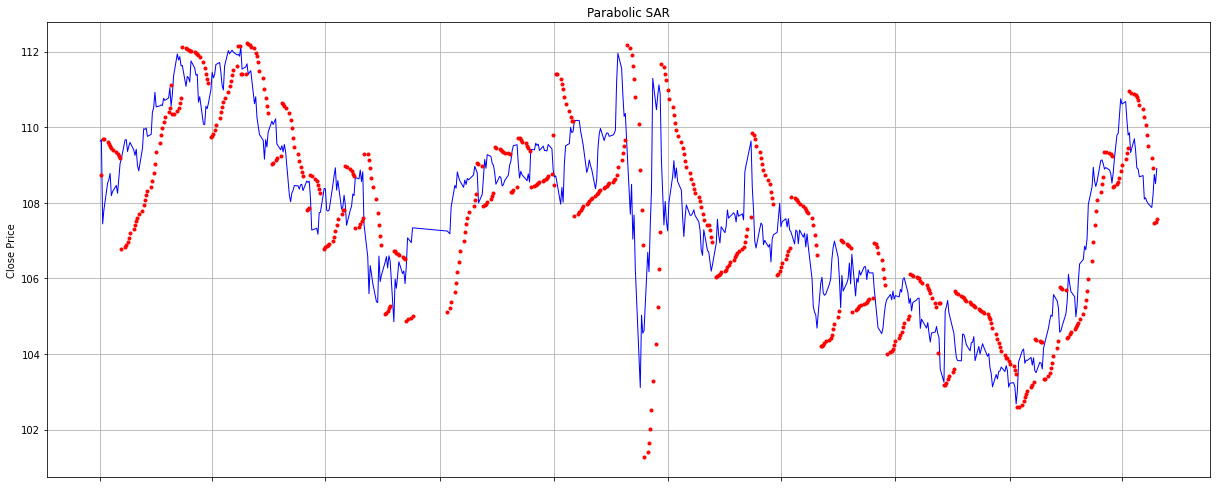

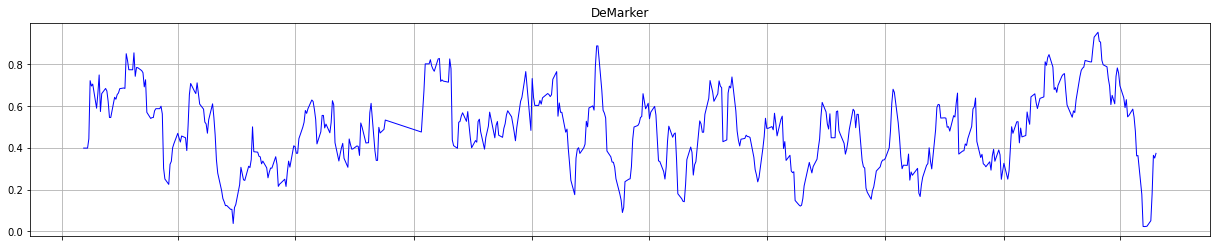

In [9]:
# Plot the price series chart 

fig = plt.figure(figsize=(17,20))
ax = fig.add_subplot(3, 1, 1)
ax.set_xticklabels([])
plt.plot(data['Close'],'b',lw=1)
plt.title('USD/JPY')
plt.ylabel('Close Price')
plt.grid(True)

# Plot Parabolic SAR with close price

fig = plt.figure(figsize=(17,20))
ax = fig.add_subplot(3, 1, 2)
ax.set_xticklabels([])
plt.plot(data['Close'],'b',lw=1)
plt.plot(data['SAR'],'r.')
plt.title('Parabolic SAR')
plt.ylabel('Close Price')
plt.grid(True)
plt.tight_layout()
plt.show()

#

fig = plt.figure(figsize=(17,10))
ax = fig.add_subplot(3, 1, 3)
ax.set_xticklabels([])
plt.plot(data['DeMarker'],'b',lw=1)
plt.title('DeMarker')
plt.grid(True)
plt.tight_layout()
plt.show()





In [10]:
qf=cf.QuantFig(data,title='USD/JPY',legend='top',name='GS')
#qf.add_ptps(periods=14, af=0.2, initial='long', str=None, name='prova')
#qf.add_bollinger_bands(periods=20,boll_std=2,colors=['magenta','grey'],fill=True)
#qf.add_sma([10,20],width=2,color=['green','lightgreen'],legendgroup=True)
qf.add_rsi(periods=20,color='java')
qf.add_cci()


qf.iplot()